<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
             Data Acquisition Exercises
</div>

Goals
At the end of this lesson, you will know...
How to read data from a csv using read_csv. This can be a csv stored locally or a Google Sheet or a file stored in Amazon Web Service (AWS) S3.
How to read data from your local clipboard using pandas.read_clipboard. This can be useful for quickly transferring data to/from a spreadsheet.
How to read data from Microsoft Excel using read_excel
How to read data from a mySQL server using read_sql(sql_query, connection_url). Using this, you can read data using a SQL query to a database. You must have the required drivers installed, and a specially formatted url string must be provided.
How, when and why to cache data locally

### Part 1 Exercise

1. Make a new repo called classification-exercises on both GitHub and within your codeup-data-science directory. This will be where you do your work for this module.
2.Inside of your local classification-exercises repo, create a file named .gitignore with the following contents:


env.py
.DS_Store
.ipynb_checkpoints/
__pycache__
*.csv
Add and commit your .gitignore file before moving forward.

3. Now that you are 100% sure that your .gitignore file lists env.py, create or copy your env.py file inside of classification-exercises. Running git status should show that git is ignoring this file.
4.In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

print the first 3 rows
print the number of rows and columns (shape)
print the column names
print the data type of each column
print the summary statistics for each of the numeric variables

In [3]:
import pandas as pd
import pydataset

In [4]:
#print the first 3 rows
#print the number of rows and columns (shape)

df_iris = pydataset.data('iris')
print('Shape: %d rows x %d cols' % df_iris.shape)
df_iris.head(3)



Shape: 150 rows x 5 cols


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [5]:
#print the column names

df_iris.columns = [column.lower().replace('.', '_') for column in df_iris.columns]
print('Columns:', df_iris.columns.tolist())
df_iris.head()

Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [6]:
#print the data type of each column
df_iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
#print the summary statistics for each of the numeric variables
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


5. Read the data from this google sheet into a dataframe, df_google.

print the first 3 rows
print the number of rows and columns
print the column names
print the data type of each column
print the summary statistics for each of the numeric variables
print the unique values for each of your categorical variables

In [8]:
import acquire
url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/export?format=csv'
df_google = pd.read_csv(url)
df_google.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
print('Shape: %d rows x %d cols' % df_google.shape)
print('object type columns:', list(df_google.select_dtypes('object')))
df_google.select_dtypes('number').apply(lambda col: col.max() - col.min()).rename('range')


Shape: 891 rows x 12 cols
object type columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
Name: range, dtype: float64

In [10]:
# Print unique values for categorical variables
for column in df_google.select_dtypes(include=['object']).columns:
    unique_values = df_google[column].unique()
    print(f"Unique values for {column}:", unique_values)



Unique values for Name: ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss.

### 6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

assign the first 100 rows to a new dataframe, df_excel_sample
print the number of rows of your original dataframe
print the first 5 column names
print the column names that have a data type of object
compute the range for each of the numeric variables.

In [13]:
#Download the file in the classification exercise folder and give .xlsx extension 
df_excel = pd.read_excel('train.xlsx')
df_excel_sample = df_excel.head(100)
print('Shape: %d rows x %d cols' % df_excel.shape)
print('object type columns:', list(df_excel.select_dtypes('object')))
df_excel.select_dtypes('number').apply(lambda col: col.max() - col.min()).rename('range')


Shape: 891 rows x 12 cols
object type columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
Name: range, dtype: float64

In [14]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [9]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_excel.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton McMillan)",female,43.0,0,1,24160,211.3375,B3,S


### Part 2 Exercise

 ### Make a new python module, acquire.py to hold the following data aquisition functions:

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [3]:
import pandas as pd
import numpy as np
from acquire import get_titanic_data

In [4]:
#Use the function defined in acquire.py module to import titanic data and assign it to a variable
titanic = get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


### 2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [ ]:
import acquire
from acquire import get_iris_data

In [9]:
#Use the function defined in acquire.py module to import iris data and assign it to a variable
iris = get_iris_data()
iris.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


### 3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [6]:
import acquire
#from acquire import get_telco_data

In [8]:
#Use the function defined in acquire.py module to import telco data and assign it to a variable
telco = get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


### 4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.
## Make sure your env.py and csv files are not being pushed to GitHub!

In [ ]:
#Update the function defined in acquire.py module as mentioned in the question

In [1]:
import acquire
from acquire import updated_get_telco_data

In [2]:
telco = updated_get_telco_data()
telco.head()

Using cached telco.csv


,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [20]:
import acquire
from acquire import updated_get_titanic_data

In [21]:
titanic = updated_get_titanic_data()
titanic.head()

Using cached titanic.csv


,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [5]:
import acquire
from acquire import updated_get_iris_data

In [6]:
iris = updated_get_iris_data()
iris.head()

Acquiring data from SQL database


,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
             Data Preparation Exercises
</div> 

<div style="background-color: lightblue; padding: 15px; font-size: 15px;">

Planning - Acquisition - Preparation - Exploratory Analysis - Modeling - Product Delivery

Goal: Prepare, tidy, and clean the data so that it is ready for exploration and analysis.

Input: 1 or more dataframes acquired through the "acquire" step.

Output: 1 dataset split into 3 samples in the form of dataframes: train, validate & test.

Artifact: prepare.py
</div> 

<div style="background-color: lightblue; padding: 15px; font-size: 15px;">

Notes on methods for handling null data:-

isnull() and notnull() Functions:return a DataFrame of the same shape as the original, with True indicating a missing value and False indicating a non-null value.

The fillna() method allows you to fill missing values with a default value or an appropriate placeholder.

Dropping Rows or Columns with Null Values:if they cannot be imputed or don't contribute significantly to the analysis.

Imputation involves filling missing values with estimated or calculated values based on the available data. Common strategies include mean, median, mode imputation, or more advanced techniques like regression-based imputation.
Fill missing values with the mean of the column
df_imputed_mean = df.fillna(df.mean())


Interpolation can be used when dealing with time-series or ordered data. It fills missing values based on the values of neighboring data points.
Linear interpolation
df_interpolated = df.interpolate()

You can use the thresh parameter with the dropna() method to specify a threshold for the number of non-null values required to keep a row or column.
Drop rows with fewer than 2 non-null values
df_thresh = df.dropna(thresh=2)
            
</div>     


In [17]:
import env
import acquire
from acquire import get_iris_data
import prepare
import pandas as pd
import numpy as np

In [ ]:
1.Use the function defined in acquire.py to load the iris data.


In [2]:
iris = get_iris_data()
iris.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


In [ ]:
2.Drop the species_id and measurement_id columns.

In [3]:

new_df_iris = iris.drop(columns =['species_id','measurement_id' ])
new_df_iris

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [ ]:
3.Rename the species_name column to just species.


In [4]:
new_df_iris = new_df_iris.rename(columns ={'species_name':'species' })

new_df_iris

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [5]:
new_df_iris.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2


### 4.Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [6]:
dummy_iris = pd.get_dummies(new_df_iris[['species']], dummy_na=False, drop_first=[True])
dummy_iris.head()

,species_versicolor,species_virginica
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [7]:
iris_df = pd.concat([new_df_iris, dummy_iris], axis=1)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width,species_versicolor,species_virginica
0,setosa,5.1,3.5,1.4,0.2,False,False
1,setosa,4.9,3.0,1.4,0.2,False,False
2,setosa,4.7,3.2,1.3,0.2,False,False
3,setosa,4.6,3.1,1.5,0.2,False,False
4,setosa,5.0,3.6,1.4,0.2,False,False


### 5.Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.


In [8]:
#get the untranformed data again  
iris_ut = get_iris_data()
iris_ut.head()

,species_id,measurement_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,1,setosa,5.1,3.5,1.4,0.2
1,1,2,setosa,4.9,3.0,1.4,0.2
2,1,3,setosa,4.7,3.2,1.3,0.2
3,1,4,setosa,4.6,3.1,1.5,0.2
4,1,5,setosa,5.0,3.6,1.4,0.2


In [9]:
# accepts the ultratransformed dataframe and returns data frame with transformations applied
def prep_iris(iris):
    iris = iris.drop(columns=['species_id','measurement_id'])
    iris = iris.rename(columns={'species_name':'species'})
    dummy_iris = pd.get_dummies(iris.species, drop_first=True)
    iris = pd.concat([iris, dummy_iris], axis=1)
    return iris


In [11]:
fresh_iris = acquire.get_iris_data()

In [13]:
iris = prep_iris(fresh_iris)
iris

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,False,False
1,setosa,4.9,3.0,1.4,0.2,False,False
2,setosa,4.7,3.2,1.3,0.2,False,False
3,setosa,4.6,3.1,1.5,0.2,False,False
4,setosa,5.0,3.6,1.4,0.2,False,False
...,...,...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3,False,True
146,virginica,6.3,2.5,5.0,1.9,False,True
147,virginica,6.5,3.0,5.2,2.0,False,True
148,virginica,6.2,3.4,5.4,2.3,False,True


In [14]:
print(iris.columns)

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'versicolor', 'virginica'],
      dtype='object')


# Using the Titanic dataset

1.Use the function defined in acquire.py to load the Titanic data.



In [18]:
from acquire import get_titanic_data

In [19]:
titanic = get_titanic_data()
titanic.sample(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
94,94,0,3,male,59.0,0,0,7.2500,S,Third,None,Southampton,1
721,721,0,3,male,17.0,1,0,7.0542,S,Third,None,Southampton,0
76,76,0,3,male,NaN,0,0,7.8958,S,Third,None,Southampton,1
366,366,1,1,female,60.0,1,0,75.2500,C,First,D,Cherbourg,0
457,457,1,1,female,NaN,1,0,51.8625,S,First,D,Southampton,0


In [ ]:
2.Drop any unnecessary, unhelpful, or duplicated columns.



In [20]:
titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [21]:
dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True)
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,True,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,True,False,True


In [22]:
titanic = pd.concat([titanic, dummy_df], axis=1)
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,True,False,True
1,1,1,1,female,1,0,71.2833,Cherbourg,0,False,False,False
2,2,1,3,female,0,0,7.9250,Southampton,1,False,False,True
3,3,1,1,female,1,0,53.1000,Southampton,0,False,False,True
4,4,0,3,male,0,0,8.0500,Southampton,1,True,False,True


### 4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.


In [29]:
def prep_titanic(titanic):
    titanic = titanic.drop(columns=['class', 'embarked', 'deck', 'age'])
    titanic = titanic.dropna()
    return titanic

In [28]:
fresh_titanic = acquire.get_titanic_data()

In [30]:
prep_titanic(fresh_titanic)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1
887,887,1,1,female,0,0,30.0000,Southampton,1
888,888,0,3,female,1,2,23.4500,Southampton,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1


# Using the Telco dataset

### 1. Use the function defined in acquire.py to load the Telco data.

In [31]:
telco = acquire.get_telco_data()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [32]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [33]:
telco.multiple_lines.value_counts()

multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [34]:
for col in telco.columns:
    print(col)
    print(telco[col].value_counts())
    print(telco[col].value_counts(normalize=True))
    print()

payment_type_id
payment_type_id
1    2365
2    1612
3    1544
4    1522
Name: count, dtype: int64
payment_type_id
1    0.335794
2    0.228880
3    0.219225
4    0.216101
Name: proportion, dtype: float64

internet_service_type_id
internet_service_type_id
2    3096
1    2421
3    1526
Name: count, dtype: int64
internet_service_type_id
2    0.439585
1    0.343746
3    0.216669
Name: proportion, dtype: float64

contract_type_id
contract_type_id
1    3875
3    1695
2    1473
Name: count, dtype: int64
contract_type_id
1    0.550192
3    0.240664
2    0.209144
Name: proportion, dtype: float64

customer_id
customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64
customer_id
0002-ORFBO    0.000142
6616-AALSR    0.000142
6625-UTXEW    0.000142
6625-IUTTT    0.000142
6625-FLENO    0.000142
                ...   
3352-RICWQ    0.

### 2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [35]:
#using crosstab to compare two categorical variables
#compare the values of the "payment_type" column with the "payment_type_id" column
pd.crosstab(telco.payment_type, telco.payment_type_id)

payment_type_id,1,2,3,4
payment_type,,,,
Bank transfer (automatic),0,0,1544,0
Credit card (automatic),0,0,0,1522
Electronic check,2365,0,0,0
Mailed check,0,1612,0,0


In [ ]:
These columns are not duplicates; they provide complementary information. So can drop one.

In [36]:
#use crosstab to check values
pd.crosstab(telco.contract_type_id, telco.contract_type)

contract_type,Month-to-month,One year,Two year
contract_type_id,,,
1,3875,0,0
2,0,1473,0
3,0,0,1695


In [37]:
#use crosstab to check values
pd.crosstab(telco.internet_service_type, telco.internet_service_type_id)

internet_service_type_id,1,2,3
internet_service_type,,,
DSL,2421,0,0
Fiber optic,0,3096,0
None,0,0,1526


Takeaways:

internet_service_type and internet_service_type_id are the same
contract_type and contract_type_id are the same
payment_type and payment_type_id are the same
Therefore, we can drop those complementary columns.

In [38]:
telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [39]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   gender                 7043 non-null   object 
 2   senior_citizen         7043 non-null   int64  
 3   partner                7043 non-null   object 
 4   dependents             7043 non-null   object 
 5   tenure                 7043 non-null   int64  
 6   phone_service          7043 non-null   object 
 7   multiple_lines         7043 non-null   object 
 8   online_security        7043 non-null   object 
 9   online_backup          7043 non-null   object 
 10  device_protection      7043 non-null   object 
 11  tech_support           7043 non-null   object 
 12  streaming_tv           7043 non-null   object 
 13  streaming_movies       7043 non-null   object 
 14  paperless_billing      7043 non-null   object 
 15  mont

In [40]:
for col in telco.columns:
    print(telco[col].value_counts())
    print()

customer_id
0002-ORFBO    1
6616-AALSR    1
6625-UTXEW    1
6625-IUTTT    1
6625-FLENO    1
             ..
3352-RICWQ    1
3352-ALMCK    1
3351-NQLDI    1
3351-NGXYI    1
9995-HOTOH    1
Name: count, Length: 7043, dtype: int64

gender
Male      3555
Female    3488
Name: count, dtype: int64

senior_citizen
0    5901
1    1142
Name: count, dtype: int64

partner
No     3641
Yes    3402
Name: count, dtype: int64

dependents
No     4933
Yes    2110
Name: count, dtype: int64

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

phone_service
Yes    6361
No      682
Name: count, dtype: int64

multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

online_backup
No                     3088
Yes              

### 3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [42]:
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [136]:
telco.gender.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [43]:
telco.gender.map({'Female': 1, 'Male': 0})


0       1
1       0
2       0
3       0
4       1
       ..
7038    1
7039    0
7040    0
7041    0
7042    0
Name: gender, Length: 7043, dtype: int64

In [44]:
# encode binary categorical variables into numeric values
telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})

telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})

telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})

telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})

telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})

telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})

In [45]:
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [46]:
dummy_df = pd.get_dummies(telco[['multiple_lines',
                                 'online_security',
                                 'online_backup',
                                 'device_protection', 
                                 'tech_support',
                                 'streaming_tv',
                                 'streaming_movies', 
                                 'contract_type', 
                                 'internet_service_type',
                                 'payment_type']],
                              drop_first=True)
dummy_df.head()

,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,False,False,False,False,False,True,False,False,False,True,...,True,False,False,True,False,False,False,False,False,True
1,False,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,False,False,False,False,False,True,False,True,False,False,...,True,False,True,False,False,True,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,True


In [47]:
telco = pd.concat( [telco, dummy_df], axis=1 )
telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,True,False,False,True,False,False,False,False,False,True
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,False,False,True,False,False,False,False,False,False,True
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,False,False,False,False,False,True,False,False,True,False
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,True,False,True,False,False,True,False,False,True,False
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,True,False,False,False,False,True,False,False,False,True


In [48]:
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


In [143]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

### 4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
'''
def prep_telco(telco):
    telco = telco.drop(columns=['internet_service_type_id', 'contract_type_id', 'payment_type_id'])

    telco['gender_encoded'] = telco.gender.map({'Female': 1, 'Male': 0})
    telco['partner_encoded'] = telco.partner.map({'Yes': 1, 'No': 0})
    telco['dependents_encoded'] = telco.dependents.map({'Yes': 1, 'No': 0})
    telco['phone_service_encoded'] = telco.phone_service.map({'Yes': 1, 'No': 0})
    telco['paperless_billing_encoded'] = telco.paperless_billing.map({'Yes': 1, 'No': 0})
    telco['churn_encoded'] = telco.churn.map({'Yes': 1, 'No': 0})
    
    dummy_df = pd.get_dummies(telco[['multiple_lines',
                                     'online_security',
                                     'online_backup',
                                     'device_protection', 
                                     'tech_support',
                                     'streaming_tv',
                                     'streaming_movies', 
                                     'contract_type', 
                                     'internet_service_type',
                                     'payment_type']],
                                  drop_first=True)
    
    telco = pd.concat( [telco, dummy_df], axis=1 )
    
    telco.total_charges = telco.total_charges.str.replace(' ', '0').astype(float)
    
    return telco
'''
#moved this function to prepare.py for reusability
#import the function from prepare.py 

In [57]:
fresh_telco = acquire.get_telco_data()

In [58]:
fresh_telco = prep_telco(fresh_telco)


In [52]:
fresh_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            7043 non-null   object 
 1   gender                                 7043 non-null   object 
 2   senior_citizen                         7043 non-null   int64  
 3   partner                                7043 non-null   object 
 4   dependents                             7043 non-null   object 
 5   tenure                                 7043 non-null   int64  
 6   phone_service                          7043 non-null   object 
 7   multiple_lines                         7043 non-null   object 
 8   online_security                        7043 non-null   object 
 9   online_backup                          7043 non-null   object 
 10  device_protection                      7043 non-null   object 
 11  tech

In [ ]:
Split your data

In [ ]:
#1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [ ]:
#created the below function and it's added to prepare.py
'''
def split_function(df, target_varible):
    train, test = train_test_split(df,
                                   random_state=123,
                                   test_size=.20,
                                   stratify= df[target_varible])
    
    train, validate = train_test_split(train,
                                   random_state=123,
                                   test_size=.25,
                                   stratify= train[target_varible])
    return train, validate, test  
 '''   

In [ ]:
#2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, 
#validate_iris and test_iris.

In [1]:
import acquire
import prepare
from prepare import split_function, prep_iris ,prep_titanic,prep_telco


In [5]:

# Load the iris dataset using acquire.get_iris_data()
iris = acquire.get_iris_data()

# Use the prep_iris function

iris = prep_iris(iris)
iris

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,virginica,6.7,3.0,5.2,2.3
146,virginica,6.3,2.5,5.0,1.9
147,virginica,6.5,3.0,5.2,2.0
148,virginica,6.2,3.4,5.4,2.3


In [6]:
#iris = get_iris_data()
train_iris, validate_iris, test_iris = split_function(iris, 'species')


In [121]:
print(f'Prepared df: {iris.shape}')   
print('===============================')
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

Prepared df: (150, 5)
Train: (90, 7)
Validate: (30, 5)
Test: (30, 5)


In [ ]:
#3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [130]:
# Load the titanic dataset using acquire.get_titanic_data()
titanic = acquire.get_titanic_data()

# Use the prep_titanic function

titanic = prep_titanic(titanic)
titanic

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,1,female,1,0,71.2833,Cherbourg,0
2,2,1,3,female,0,0,7.9250,Southampton,1
3,3,1,1,female,1,0,53.1000,Southampton,0
4,4,0,3,male,0,0,8.0500,Southampton,1
...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1
887,887,1,1,female,0,0,30.0000,Southampton,1
888,888,0,3,female,1,2,23.4500,Southampton,0
889,889,1,1,male,0,0,30.0000,Cherbourg,1


In [131]:
train_titanic, validate_titanic, test_titanic = split_function(titanic, 'survived')

In [132]:
print(f'Prepared df: {titanic.shape}')
print('================================')
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

Prepared df: (889, 9)
Train: (533, 9)
Validate: (178, 9)
Test: (178, 9)


In [ ]:
#4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [2]:
# Load the telco dataset using acquire.get_telco_data()
telco = acquire.get_telco_data()

# Use the prep_telco function

telco = prep_telco(telco)
telco

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,True,False,False,True,False,False,False,False,False,True
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,False,False,True,False,False,False,False,False,False,True
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,False,False,False,False,False,True,False,False,True,False
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,No,Yes,...,True,False,True,False,False,True,False,False,True,False
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,No,No,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,Yes,No,...,False,False,False,True,False,False,False,False,False,True
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,No,No,...,False,False,True,False,False,True,False,False,True,False
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,No,Yes,...,False,False,False,False,False,False,False,False,False,True
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,Yes,No,...,False,False,True,False,True,False,False,False,False,True


In [3]:
train_telco, validate_telco, test_telco = split_function(telco, 'churn')

In [133]:
print(f'Prepared df: {telco.shape}')
print('===============================')
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Prepared df: (7043, 48)
Train: (7043, 48)
Validate: (1409, 48)
Test: (1409, 48)


In [6]:
train_telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,True,False,False,True,False,False,False,False,False,False
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,False,True,False,True,False,False,True,False,True,False


In [7]:
validate_telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3554,5035-PGZXH,Female,0,No,No,56,Yes,Yes,No,Yes,...,True,False,True,True,False,True,False,False,True,False
2063,2969-VAPYH,Female,0,No,No,67,Yes,No,Yes,Yes,...,False,False,False,True,False,False,False,True,False,False


In [8]:
test_telco.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3160,4531-AUZNK,Female,0,Yes,Yes,51,Yes,Yes,Yes,No,...,True,False,False,True,False,True,False,False,False,True
1577,2296-DKZFP,Female,0,Yes,No,65,Yes,No,Yes,Yes,...,False,False,True,False,True,False,False,False,False,False


<div style="background-color: lightblue; padding: 40px; font-size: 40px;">
             Exploratory Data Analysis Exercises
</div> 

Exploration is where we actually learn the story contained in our data. Since exploring (and getting to know the domain of the data) can lead to feature engineering, feature elimination to reduce noise, and domain based outlier handling, our exploration efforts can directly lead to better models.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import acquire
import prepare

# Part 1

# Section 1 - iris_db: 

Using iris data from our mySQL server and the methods used in the lesson above:



### 1. Acquire, prepare & split your data.

In [11]:

# Load the iris dataset using acquire.get_iris_data()
iris = acquire.get_iris_data()

# Use the prep_iris function

iris = prep_iris(iris)
iris
# Split data
train_iris, validate_iris, test_iris = split_function(iris, 'species')
train_iris.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width
70,versicolor,5.9,3.2,4.8,1.8
123,virginica,6.3,2.7,4.9,1.8


### 2. Univariate Stats

For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

Document takeaways & any actions.

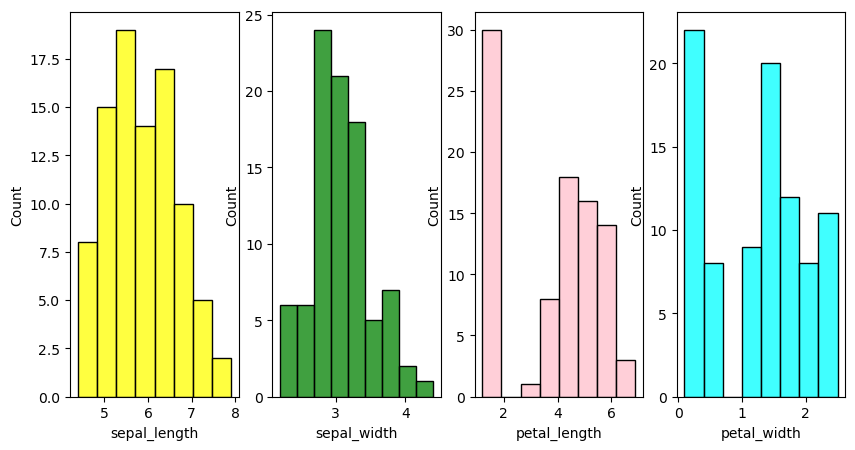

In [16]:
#single row of four histograms using Seaborn for visualizing the distributions of different columns 
#from the train_iris DataFrame

f, axes = plt.subplots(1, 4, figsize=(10,5))
sns.histplot(train_iris.iloc[:,1], color="yellow", ax=axes[0])
sns.histplot(train_iris.iloc[:,2], color="green", ax=axes[1])
sns.histplot(train_iris.iloc[:,3], color="pink", ax=axes[2])
sns.histplot(train_iris.iloc[:,4], color="cyan", ax=axes[3])
plt.show()


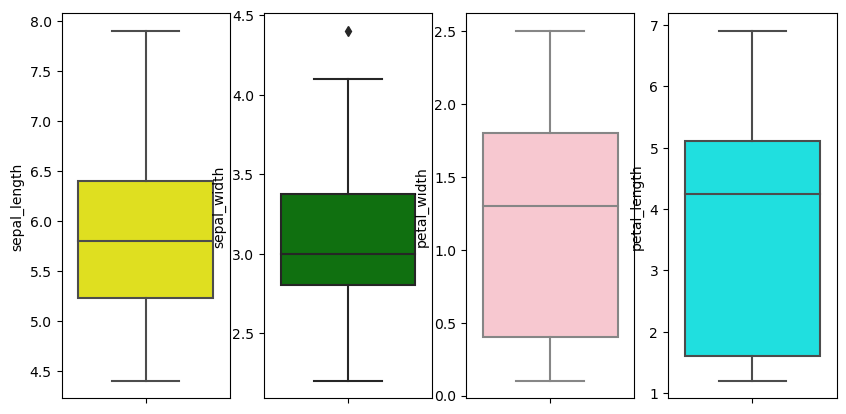

In [18]:
# Bar plots for each measurement type
f, axes = plt.subplots(1, 4, figsize=(10,5))
sns.boxplot(y = train_iris['sepal_length'], color = "yellow", ax=axes[0])
sns.boxplot(y = train_iris['sepal_width'], color = "green", ax=axes[1])
sns.boxplot(y = train_iris['petal_width'], color = "pink", ax=axes[2])
sns.boxplot(y = train_iris['petal_length'], color="cyan", ax=axes[3])
plt.show()

In [19]:
# Descriptive statistics
train_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,90.000000,90.000000,90.000000,90.000000
mean,5.875556,3.070000,3.782222,1.203333
std,0.792282,0.436135,1.742114,0.755422
min,4.400000,2.200000,1.200000,0.100000
25%,5.225000,2.800000,1.600000,0.400000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.375000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [20]:
# Frequency table of each species
train_iris.species.value_counts()

species
versicolor    30
virginica     30
setosa        30
Name: count, dtype: int64

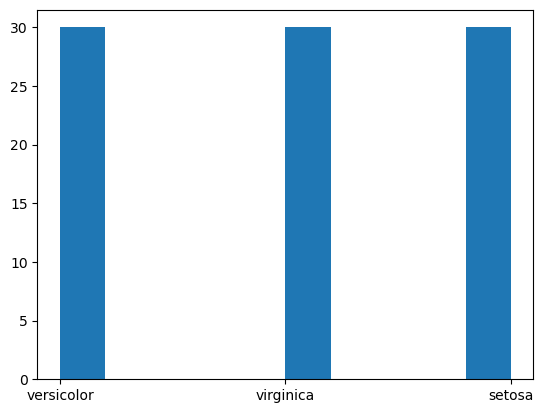

In [21]:
# Bar plot of each frequency
plt.hist(train_iris.species)
plt.show() 

### 3.Bivariate Stats
Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

For each measurement type, compute the descriptive statistics for each species.

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

Document takeaways & any actions.

a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).



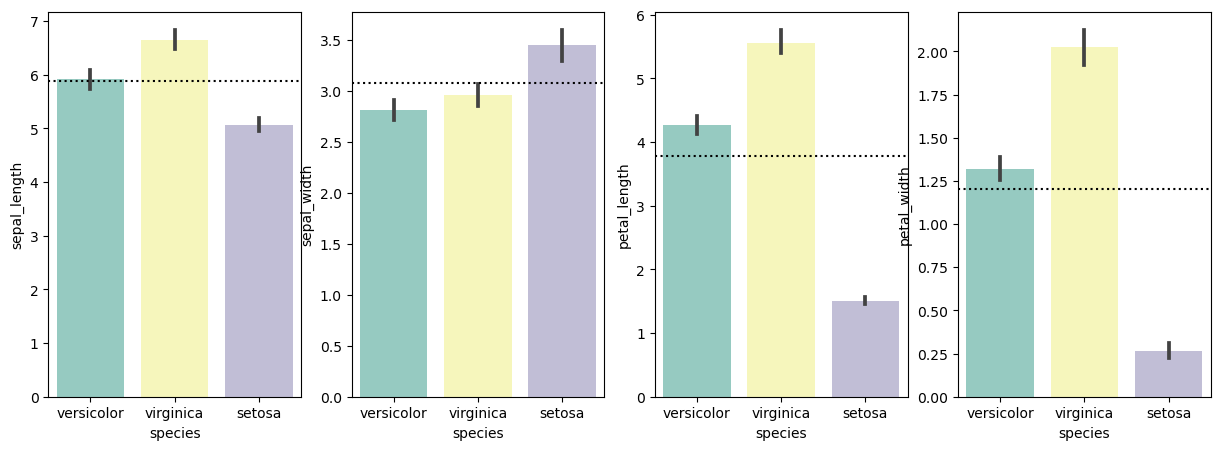

In [31]:
f, axes = plt.subplots(1, 4, figsize=(15,5))
sns.barplot(data=train_iris, x="species", y="sepal_length",ax=axes[0], palette="Set3")
l0 = axes[0].axhline(train_iris.sepal_length.mean(),color='black', linestyle='dotted')
sns.barplot(data=train_iris, x="species", y="sepal_width",ax=axes[1], palette="Set3")
l1 = axes[1].axhline(train_iris.sepal_width.mean(), color='black', linestyle='dotted')
sns.barplot(data=train_iris, x="species", y="petal_length",ax=axes[2], palette="Set3")
l2 = axes[2].axhline(train_iris.petal_length.mean(), color='black', linestyle='dotted')
sns.barplot(data=train_iris, x="species", y="petal_width",ax=axes[3], palette="Set3")
L3 = axes[3].axhline(train_iris.petal_width.mean(), color='black', linestyle='dotted')
plt.show()


In [ ]:
b. For each measurement type, compute the descriptive statistics for each species.



In [33]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 70 to 97
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       90 non-null     object 
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [44]:
unique_values = train_iris['species'].unique()

unique_values

array(['versicolor', 'virginica', 'setosa'], dtype=object)

In [46]:
# Virginica descriptive statistics
train_iris[train_iris.species == 'virginica'].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,30.0,6.646667,0.533520,5.8,6.300,6.50,6.9,7.9
sepal_width,30.0,2.956667,0.309263,2.2,2.800,3.00,3.1,3.8
petal_length,30.0,5.563333,0.492344,4.8,5.125,5.55,5.8,6.9
petal_width,30.0,2.023333,0.286095,1.5,1.800,2.00,2.3,2.5


In [47]:
# Setosa descriptive statistics
train_iris[train_iris.species == 'setosa'].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,30.0,5.070000,0.356371,4.4,4.825,5.0,5.375,5.8
sepal_width,30.0,3.446667,0.420782,2.3,3.200,3.4,3.775,4.4
petal_length,30.0,1.510000,0.178789,1.2,1.400,1.5,1.600,1.9
petal_width,30.0,0.266667,0.121296,0.1,0.200,0.2,0.375,0.6


In [49]:
# Versicolor descriptive statistics
train_iris[train_iris.species == 'versicolor'].describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,30.0,5.910000,0.476590,4.9,5.600,5.80,6.175,7.0
sepal_width,30.0,2.806667,0.281539,2.3,2.625,2.80,3.000,3.4
petal_length,30.0,4.273333,0.409317,3.3,4.000,4.25,4.575,5.1
petal_width,30.0,1.320000,0.193694,1.0,1.200,1.30,1.475,1.8


c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [52]:
virginica = train_iris[train_iris.species == 'virginica']
versicolor = train_iris[train_iris.species == 'versicolor']

t, p = stats.mannwhitneyu(virginica.petal_width, versicolor.petal_width, alternative="two-sided")
t, p

#We have a significantly lower p value than 0.05, we can reject the null hypotehsis

test_var = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for var in test_var:
    t, p = stats.mannwhitneyu(virginica[var], versicolor[var], alternative="two-sided")
    print(f'Comparing {var} between virginica and versicolor')
    print(t, p)
    print('------------------')
    print('\n')

Comparing sepal_length between virginica and versicolor
767.0 2.7482419419191076e-06
------------------


Comparing sepal_width between virginica and versicolor
575.0 0.06370930409956933
------------------


Comparing petal_length between virginica and versicolor
892.5 6.02995793051305e-11
------------------


Comparing petal_width between virginica and versicolor
883.0 1.274471779403707e-10
------------------




In [ ]:
d. Document takeaways & any actions.

Takeaways:

petal_length and petal_width show the most seperation between species.

Could petal and sepal area be useful features?

virginica iris have the largest petals.
versicolor iris have the smallest petals.
versicolor seem to have wide & short sepals.

### 4.Multivariate Stats

Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Document takeaways and any actions.

a. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [54]:
train_iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 70 to 97
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species       90 non-null     object 
 1   sepal_length  90 non-null     float64
 2   sepal_width   90 non-null     float64
 3   petal_length  90 non-null     float64
 4   petal_width   90 non-null     float64
 5   sepal_area    90 non-null     float64
 6   petal_area    90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


In [56]:
#create new column that is area
train_iris['sepal_area'] = train_iris['sepal_length'] * train_iris['sepal_width']
train_iris['petal_area'] = train_iris['petal_length'] * train_iris['petal_width']
train_iris.drop(columns="species")

#let's look at our new dataframe
train_iris.head()


,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
70,versicolor,5.9,3.2,4.8,1.8,18.88,8.64
123,virginica,6.3,2.7,4.9,1.8,17.01,8.82
87,versicolor,6.3,2.3,4.4,1.3,14.49,5.72
3,setosa,4.6,3.1,1.5,0.2,14.26,0.30
15,setosa,5.7,4.4,1.5,0.4,25.08,0.60


In [ ]:
#import itertools

#list(itertools.combinations(train.drop(columns='species').columns, 2))

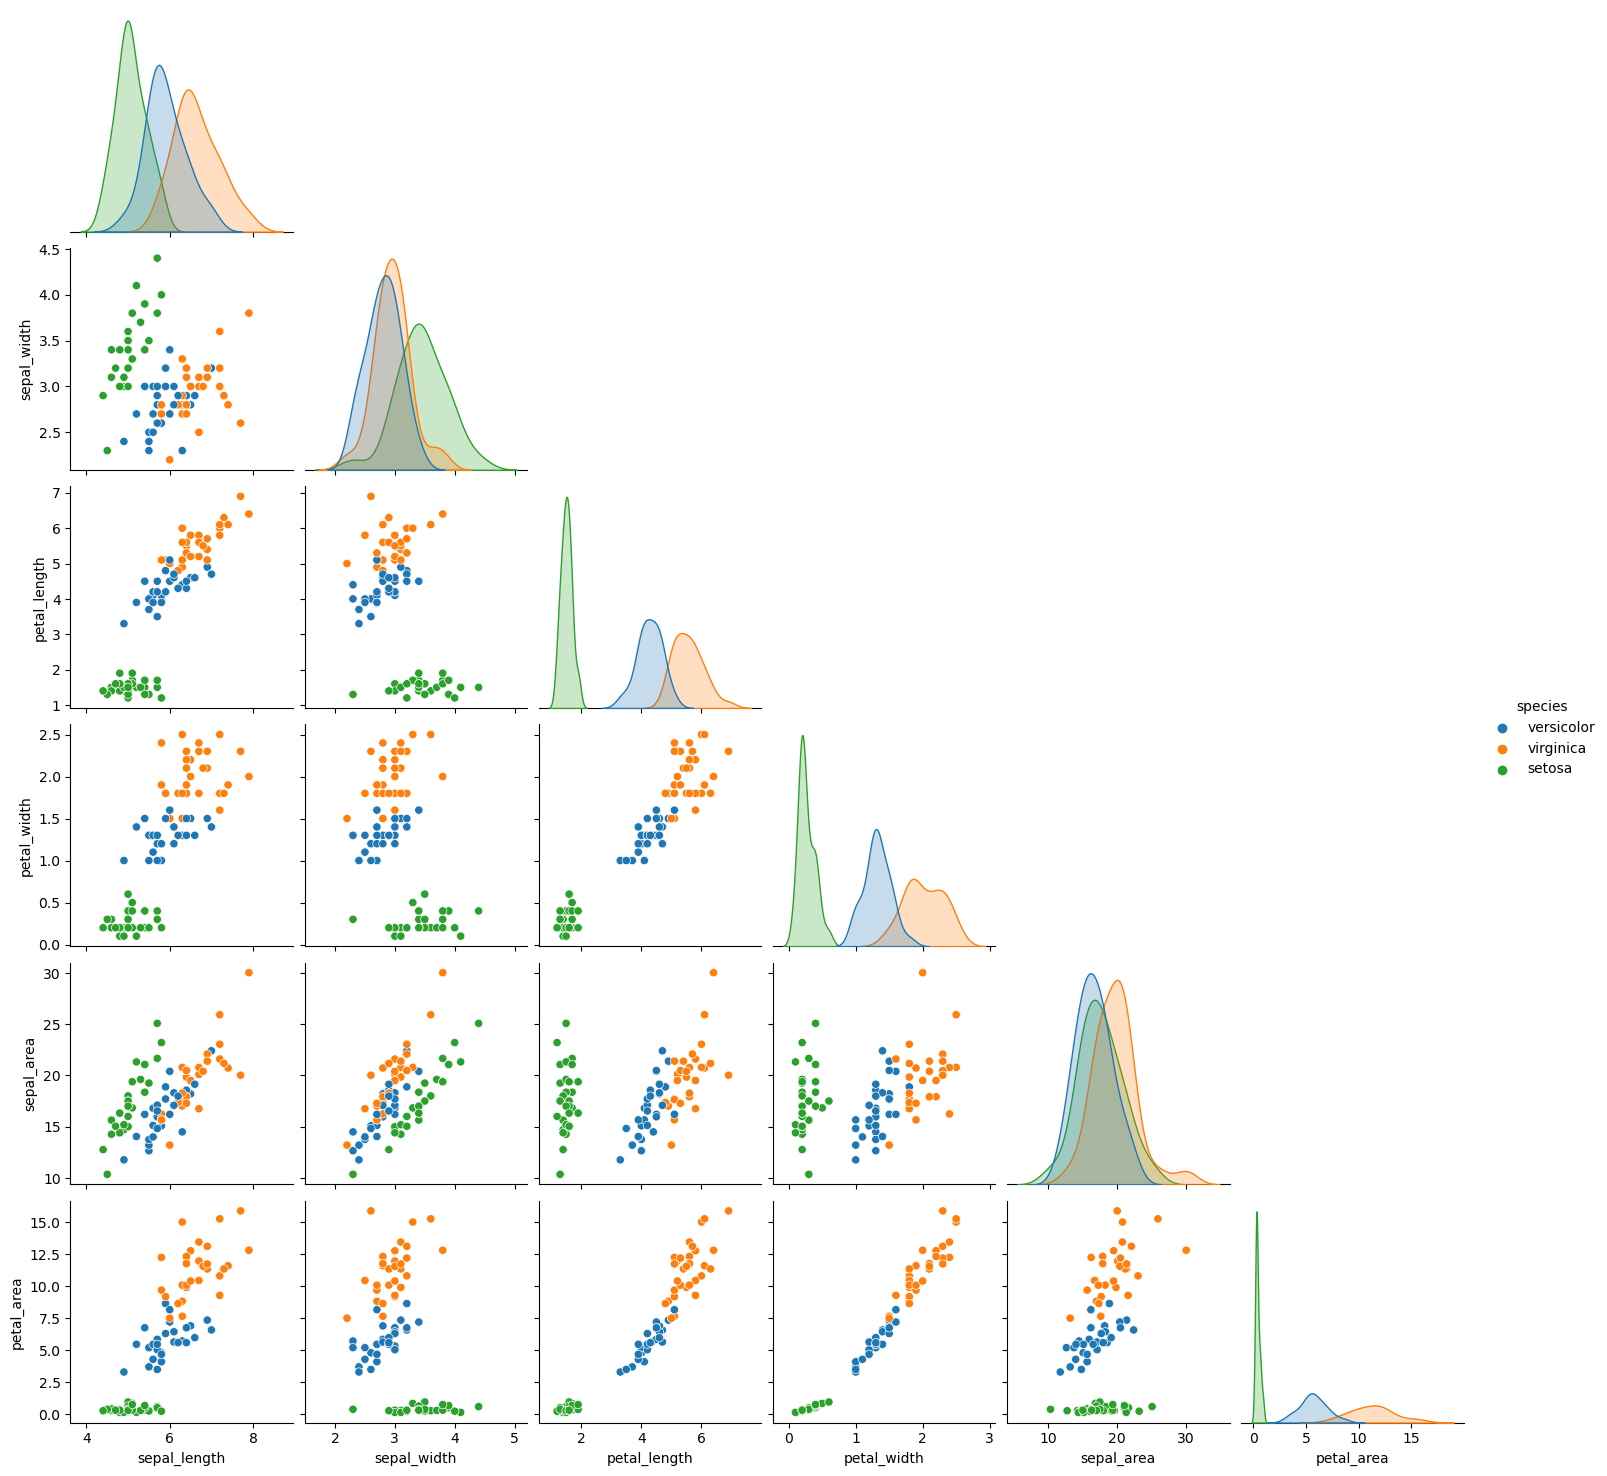

In [60]:
sns.pairplot(train_iris, hue='species', corner=True)
plt.show()

In [ ]:
b. Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

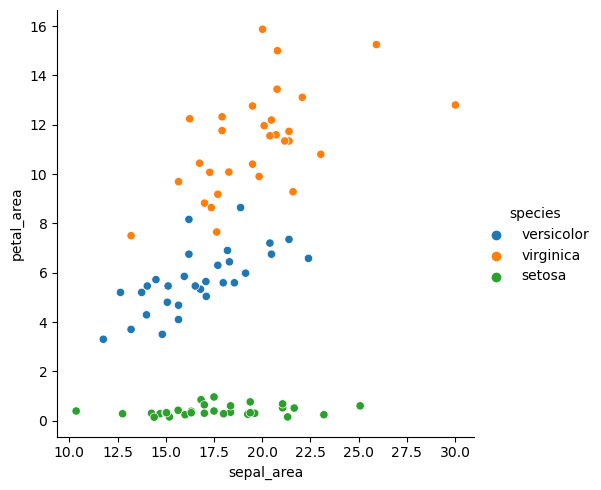

In [61]:
sns.relplot(x='sepal_area', y='petal_area', data=train_iris, hue='species')


c. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.



/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 43.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 12.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/cat

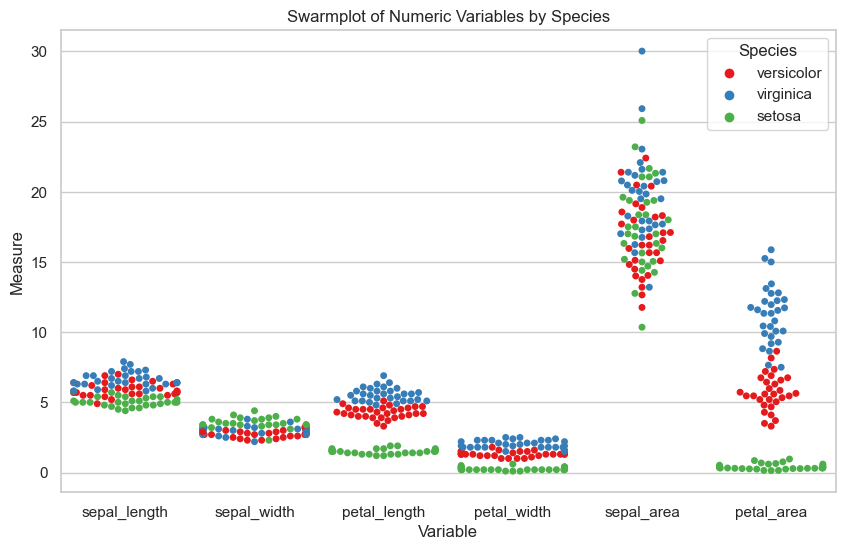

In [64]:
# Melt the DataFrame to create a long-format dataset
melted_df = train_iris.melt(id_vars='species', var_name='variable', value_name='measure')

# Create a swarmplot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.swarmplot(data=melted_df, x='variable', y='measure', hue='species', palette='Set1')

# Add labels and legend
plt.xlabel('Variable')
plt.ylabel('Measure')
plt.title('Swarmplot of Numeric Variables by Species')
plt.legend(title='Species')

# Display the plot
plt.show()


d. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

Hypothesi:
    Ha: Sepal length is the same in Setosa and Virginica
    H0: Sepal length is different in Setosa and Virginica

In [67]:
virginica = train_iris[train_iris['species'] == 'virginica']
setosa = train_iris[train_iris['species'] == 'setosa']

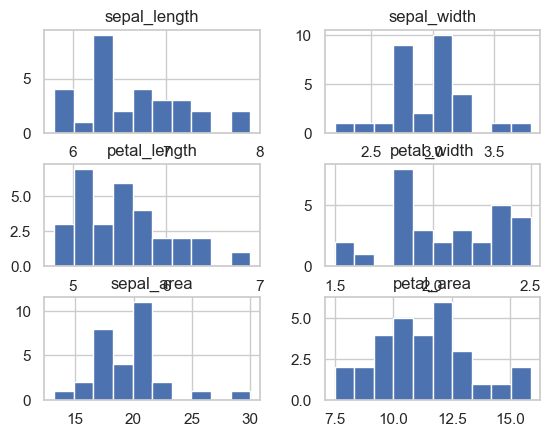

In [68]:
virginica.hist()
plt.show()

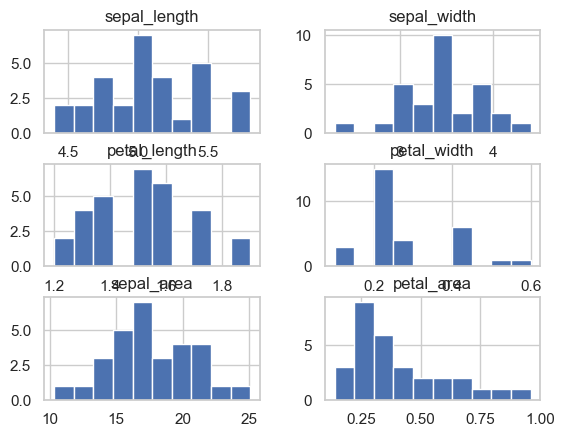

In [69]:
setosa.hist()
plt.show()

In [70]:
virginica.sepal_length.var()

0.28464367816091957

In [71]:
setosa.sepal_length.var()


0.127

In [72]:
tstat, p = stats.ttest_ind(virginica.sepal_length, setosa.sepal_length, equal_var= False)

tstat, p

(13.459836620630853, 2.405034279694716e-18)

In [81]:
alpha = 0.05


In [79]:
if (p > alpha):
    print('Reject null hypothesis')
else:
    print('Fail to reject null hypothesis')

Fail to reject null hypothesis


In [82]:
stats.mannwhitneyu(virginica.sepal_length, setosa.sepal_area)


MannwhitneyuResult(statistic=0.0, pvalue=2.926546016458766e-11)

In [ ]:
e. Document takeaways and any actions.

Sepal length can be used to distinguish setosa from the others.
Sepal length can also help separate virginica and versicolor, as virginica is slightly shorter.
Virginica and versicolor overlap in sepal width.
Sepal area does not seem to add any value beyond what sepal_length already added.

# Part II  Titanic dataset 


In [ ]:
Explore your titanic dataset more completely.
Determine drivers of the target variable
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
Does it make sense to combine any features?
Do you find any surprises?
Document any and all findings and takeaways in your notebook using markdown.

In [7]:
import pandas as pd
import numpy as np
import acquire
from acquire import get_titanic_data
from prepare import prep_titanic ,split_function
from sklearn.model_selection import train_test_split

### Explore your titanic dataset more completely.

In [11]:
titanic = acquire.new_titanic_data()
titanic

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,27.0,0,0,13.0000,S,Second,None,Southampton,1
887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,0,3,female,NaN,1,2,23.4500,S,Third,None,Southampton,0
889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


### 1. Determine drivers of the target variable

In [ ]:
Target Variable: Survived
Drivers: fare, age, class, alone

### 2.Determine if certain columns should be dropped

drop columns 'class', 'embarked', 'deck', 'age'

### 3.Determine if it would be valuable to bin some numeric columns



Analyze the distribution of numeric columns like "age" and "fare" to determine if binning (grouping values into ranges) could provide clearer insights. Create visualizations like histograms to understand the distribution of these variables and their relationship with survival.

### 4 .Determine if it would be valuable to combine multiple columns into one.




Explore whether combining certain features can provide more meaningful information. For example, combining "sibsp" (siblings/spouses aboard) and "parch" (parents/children aboard) could yield a new "family_size" feature.
Check if creating derived features like "title" from the "name" column could capture valuable insights.

### 5 . Does it make sense to combine any features?



In [ ]:
Evaluate if combining features results in improved predictive power or clearer patterns.
Consider the potential multicollinearity effects of combining highly correlated features.

### 6. Do you find any surprises?



In [ ]:
Look for patterns or anomalies that may not have been anticipated during initial exploration.
Explore interactions between features that lead to unexpected insights.
Consider creating visualizations or cross-tabulations to uncover relationships not apparent at first glance.

### 7.Document any and all findings and takeaways in your notebook using markdown.


In [ ]:
Summarize key insights, findings, and conclusions in a structured manner.
Provide explanations for any decisions made, such as feature selection, dropping, or binning.
Present visualizations and charts that support your observations.

In [12]:
# Load the titanic dataset using acquire.get_titanic_data()
titanic = acquire.get_titanic_data()

# Use the prep_titanic function
titanic = prep_titanic(titanic)
titanic

# Split data
train_titanic, validate_titanic, test_titanic = split_function(titanic, 'survived')
train_titanic.head(2)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
627,627,1,1,female,0,0,77.9583,Southampton,1
390,390,1,1,male,1,2,120.0000,Southampton,0


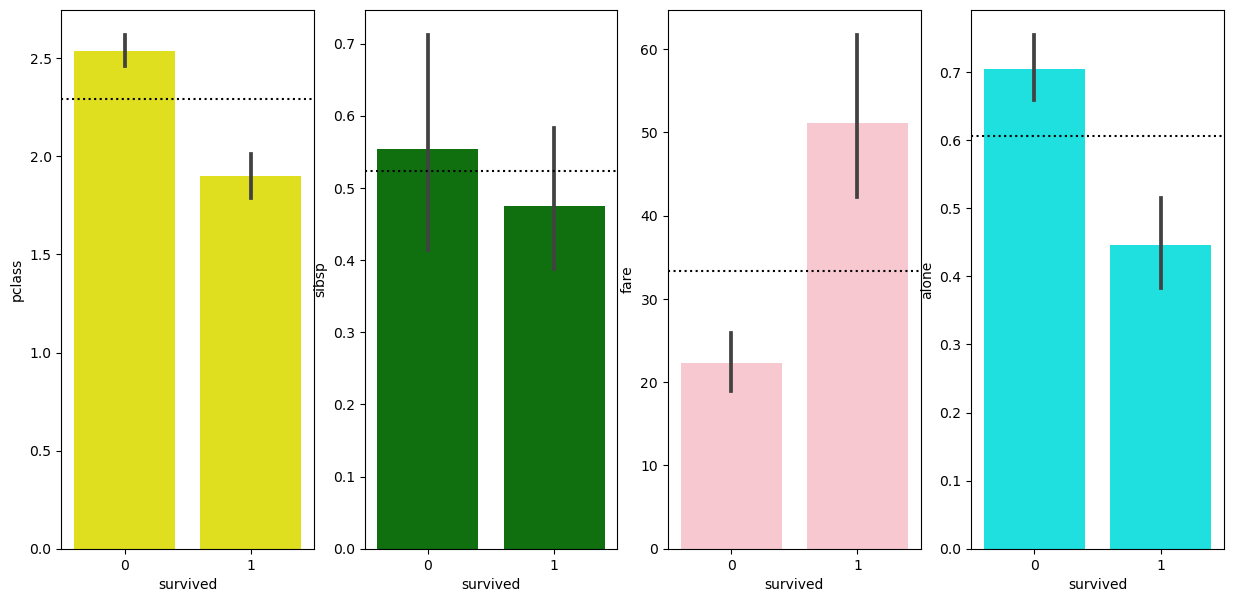

In [20]:
#Bar plots comparing the "survived" variable against "pclass," "sibsp," "fare," and "alone" columns 
#from the Titanic dataset. 
# The dotted lines indicates the mean values for each respective column

import matplotlib.pyplot as plt
import seaborn as sns

f, axes = plt.subplots(1, 4, figsize=(15,7))
sns.barplot(data=train_titanic, x="survived", y="pclass",ax=axes[0], color='yellow')
l0 = axes[0].axhline(train_titanic.pclass.mean(),color='black', linestyle='dotted')
sns.barplot(data=train_titanic, x="survived", y="sibsp",ax=axes[1], color='green')
l1 = axes[1].axhline(train_titanic.sibsp.mean(), color='black', linestyle='dotted')
sns.barplot(data=train_titanic, x="survived", y="fare",ax=axes[2], color='pink')
l2 = axes[2].axhline(train_titanic.fare.mean(), color='black', linestyle='dotted')
sns.barplot(data=train_titanic, x="survived", y="alone",ax=axes[3], color='cyan')
l3 = axes[3].axhline(train_titanic.alone.mean(), color='black', linestyle='dotted')
plt.show()

# Part III    Telco data

In [ ]:
Explore your telco data to discover drivers of churn
Determine if certain columns should be dropped
Determine if it would be valuable to bin some numeric columns
Determine if it would be valuable to combine multiple columns into one.
What are your drivers of churn?
Does it make sense to combine any features?
Do you find any surprises?
Document any and all findings and takeaways in your notebook using markdown.

### 1. Explore your telco data to discover drivers of churn

In [85]:
# Load the iris dataset using acquire.get_iris_data()
telco = acquire.get_telco_data()

# Use the prep_iris function
telco = prep_telco(telco)

# Split data
train_telco, validate_telco, test_telco = split_function(telco, 'churn')
train_telco.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Male,0,No,Yes,26,No,No phone service,No,Yes,...,True,False,False,True,False,False,False,False,False,False
2479,3547-LQRIK,Female,0,Yes,No,47,Yes,Yes,No internet service,No internet service,...,False,True,False,True,False,False,True,False,True,False
5889,8280-MQRQN,Female,0,No,No,1,Yes,No,No,No,...,False,False,False,False,False,False,False,False,False,True
6087,8626-PTQGE,Male,0,No,No,69,No,No phone service,Yes,Yes,...,True,False,True,False,True,False,False,False,False,False
785,1142-IHLOO,Female,0,No,No,51,Yes,No,No,No,...,True,False,True,True,False,True,False,True,False,False


### 2. Determine if certain columns should be dropped

In [ ]:
Dropping the columns internet_service_type_id, contract_type_id, payment_type_id as they are duplicate columns.


In [88]:
train_telco.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 5911 to 3586
Data columns (total 48 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            4225 non-null   object 
 1   gender                                 4225 non-null   object 
 2   senior_citizen                         4225 non-null   int64  
 3   partner                                4225 non-null   object 
 4   dependents                             4225 non-null   object 
 5   tenure                                 4225 non-null   int64  
 6   phone_service                          4225 non-null   object 
 7   multiple_lines                         4225 non-null   object 
 8   online_security                        4225 non-null   object 
 9   online_backup                          4225 non-null   object 
 10  device_protection                      4225 non-null   object 
 11  tech_s

In [89]:
telco.head().T

,0,1,2,3,4
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No


### 3.Determine if it would be valuable to bin some numeric columns

In [ ]:
Encode binary catgorical values into numerical values 

### 4.Determine if it would be valuable to combine multiple columns into one.

Combining multiple columns into one can be valuable in some situations, especially when it helps simplify the dataset, capture interactions between variables, or create more meaningful features for analysis or modeling. 

### 5.What are your drivers of churn?

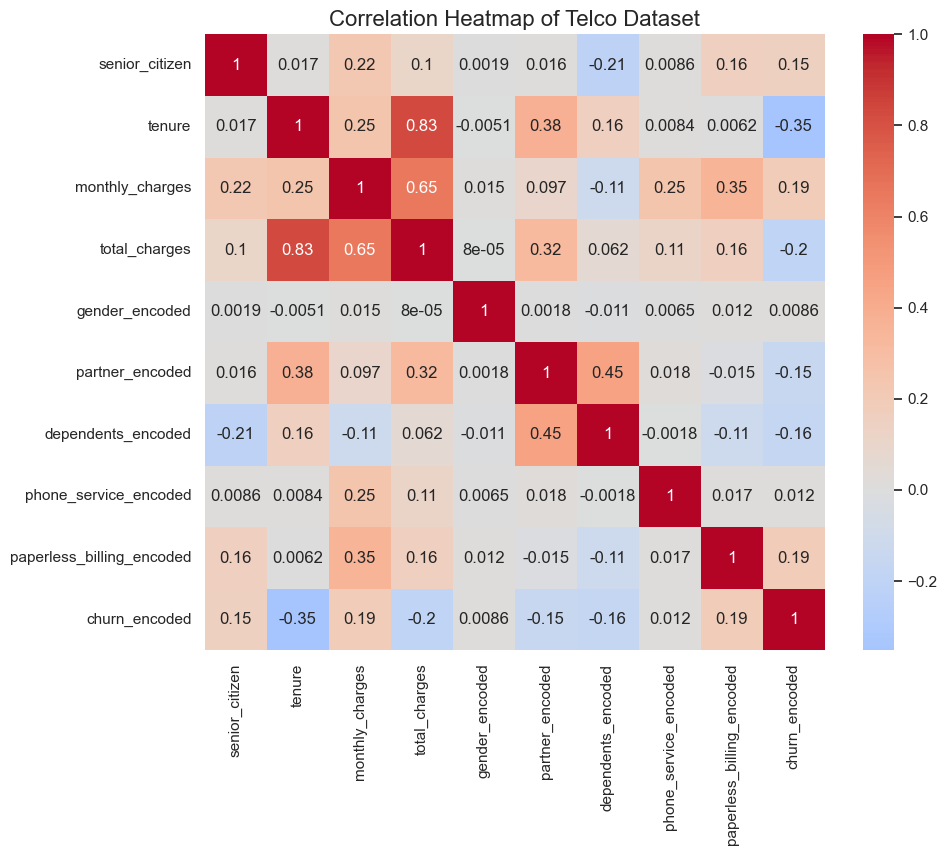

In [112]:
#Heat Map for observing the correlation of Telco Dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from acquire import get_telco_data
from prepare import prep_telco

# Load and prepare the data using your preprocessing function
train_telco = prep_telco(get_telco_data())

# Select only numeric columns for correlation calculation
numeric_columns = train_telco.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set a larger figure size
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

# Customize plot settings (optional)
plt.title('Correlation Heatmap of Telco Dataset', fontsize=16)

# Show the plot
plt.show()


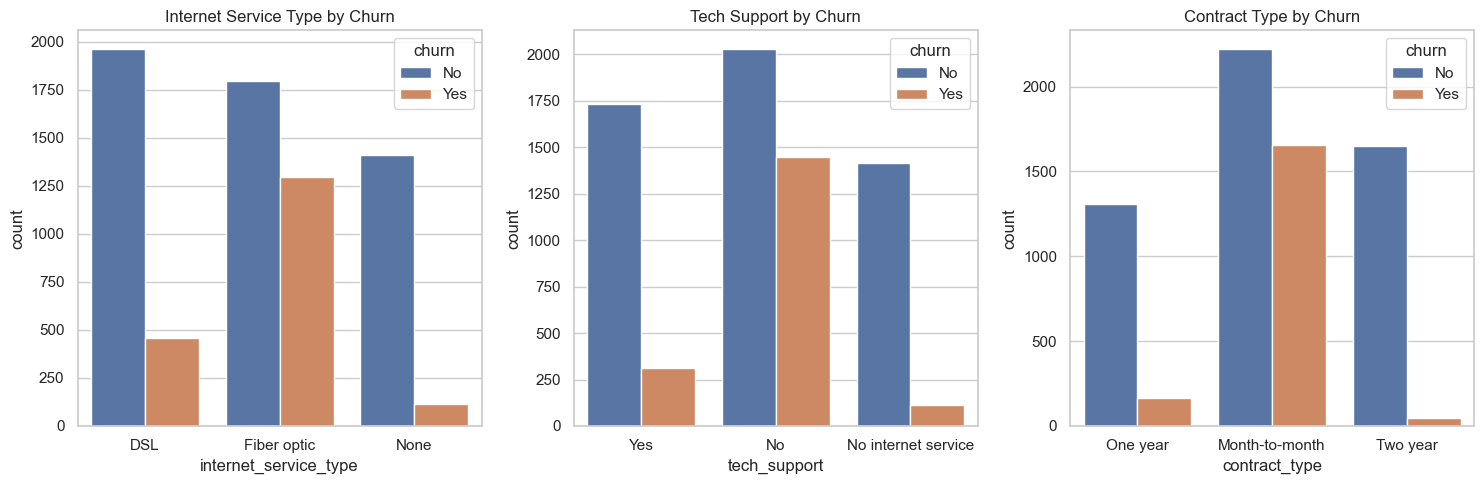

In [109]:
#Discovering drivers of churn
plt.figure(figsize=(15, 5))

# Plot for Internet Service Type
plt.subplot(1, 3, 1)
sns.countplot(data=train_telco, x="internet_service_type", hue="churn")
plt.title("Internet Service Type by Churn")

# Plot for Tech Support
plt.subplot(1, 3, 2)
sns.countplot(data=train_telco, x="tech_support", hue="churn")
plt.title("Tech Support by Churn")

# Plot for Contract Type
plt.subplot(1, 3, 3)
sns.countplot(data=train_telco, x="contract_type", hue="churn")
plt.title("Contract Type by Churn")

# Adjust layout
plt.tight_layout()
plt.show()




Customers who are on month to month contract are more likely to churn than long term contract (one year or two year contract). 

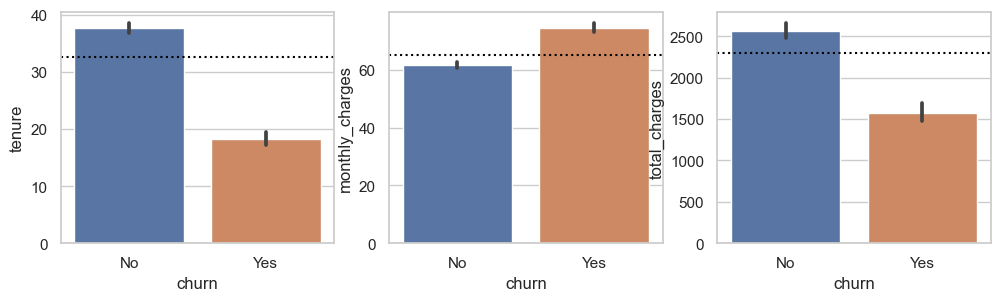

In [91]:
#Discovering drivers of churn
f, axes = plt.subplots(1, 3, figsize=(12,3))
sns.barplot(data=train_telco, x="churn", y="tenure",ax=axes[0])
l0 = axes[0].axhline(train_telco.tenure.mean(),color='black', linestyle='dotted')
sns.barplot(data=train_telco, x="churn", y="monthly_charges",ax=axes[1])
l1 = axes[1].axhline(train_telco.monthly_charges.mean(), color='black', linestyle='dotted')
sns.barplot(data=train_telco, x="churn", y="total_charges",ax=axes[2])
l2 = axes[2].axhline(train_telco.total_charges.mean(), color='black', linestyle='dotted')
plt.show()


### 6. Does it make sense to combine any features?

Yes, it can make sense to combine certain features in the Telco dataset in order to create more informative and predictive variables.
Ex: Instead of analyzing individual service features like online security, online backup, device protection, and tech support separately, you could create an aggregated variable that represents the overall presence or absence of these services

Ex:Combining total charges and monthly charges into a single variable, such as average monthly charges over the tenure, could provide a more comprehensive view of a customer's payment behavior and their overall investment in the company's services.

### 7.Do you find any surprises?

The correlation between the absence of tech support and churn could be unexpected.

The variations in churn rates among different contract types might raise questions about the effectiveness of each contract type's benefits and terms. The unexpected differences could prompt the company to assess whether certain contract types are meeting customer needs and if changes are required to optimize retention.


Correlation between total charges and churn: Total charges might be related to the duration of the customer's subscription, and one would assume that long-term customers would be less likely to churn. This finding could indicate that there are specific cases where customers with higher total charges are churning, possibly due to other factors such as service quality or customer experience.

 


### 8.Document any and all findings and takeaways in your notebook using markdown.


Insights and Reporting:- 
Extracting insights that help the company understand why customers churn and how to retain them.


1. Major factor that have influenced the customers decision to churn is the increased monthly charges . 

2. Inorder to retain customers the company should think about making adjustments in their monthly charges by implementing more competitive pricing strategies. Offer affordable plans or promotional offers to customers who have been with the company for a certain period.That might help retain them.
 